In [13]:
import numpy as np
import pandas as pd
import scipy.io as spi

import matplotlib.pyplot as plt
%matplotlib inline

/Users/masl3485/Desktop/NGIMS_homopause/env/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
###########################################
###matplotlib changes
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 12
rcParams['mathtext.fontset'] = 'custom'
rcParams['xtick.major.size'] = 5
rcParams['ytick.major.size'] = 5
rcParams['xtick.minor.size'] = 3
rcParams['ytick.minor.size'] = 3
rcParams['xtick.major.width'] = 1
rcParams['ytick.major.width'] = 1
rcParams['xtick.minor.width'] = 1
rcParams['ytick.minor.width'] = 1
rcParams['lines.markeredgewidth'] = 1
###########################################

In [2]:
import yaml
with open('../config_local.yaml','r') as cf:
    config = yaml.load(cf)

In [15]:
import os
data_path = os.path.expanduser(config['data_path'])
vers = '01'
rev = '00'
vrdif = 'euvm_temperatures_v'+vers+'r'+rev+'/'
data_path_vr = os.path.join(data_path,vrdif)

In [16]:
sav = spi.readsav(data_path_vr+'temp_1101out_v01r00.sav')

In [17]:
sav.keys()

['location_info', 'pressure', 't_ref', 'temp', 'density']

In [18]:
loc = sav['location_info'] #alt,lat,long,lst,unixt

In [23]:
sav

{'density': array([[  1.16566124e+02,   1.81908006e+11],
        [  1.17567529e+02,   1.66811097e+11],
        [  1.18568933e+02,   1.44725890e+11],
        [  1.19570335e+02,   1.26082841e+11],
        [  1.20571736e+02,   1.10308459e+11],
        [  1.21573136e+02,   9.71609797e+10],
        [  1.22574534e+02,   8.86078814e+10],
        [  1.23575931e+02,   7.63006011e+10],
        [  1.24577326e+02,   6.56764992e+10],
        [  1.25578720e+02,   5.67651338e+10],
        [  1.26580113e+02,   4.93550342e+10],
        [  1.27581504e+02,   4.33418454e+10],
        [  1.28582894e+02,   3.96065427e+10],
        [  1.29584282e+02,   3.42269771e+10],
        [  1.30585669e+02,   2.97832184e+10],
        [  1.31587054e+02,   2.61604062e+10],
        [  1.32588438e+02,   2.32460368e+10],
        [  1.33589821e+02,   2.09050499e+10],
        [  1.34591203e+02,   1.94187723e+10],
        [  1.35592582e+02,   1.72937470e+10],
        [  1.36593961e+02,   1.54645278e+10],
        [  1.37595338e+

In [61]:
tdf_init = pd.DataFrame(sav['temp'],columns=['alt_temp','temp'])

In [62]:
tdf_init['pressure'] = sav['pressure']

In [63]:
den_df = pd.DataFrame(sav['density'],columns=['alt_den','density'])

In [64]:
tdf_init['lat'] = sav['location_info'][0][1]
tdf_init['lon'] = sav['location_info'][0][2]
tdf_init['lst'] = sav['location_info'][0][3]

In [65]:
pd.concat([tdf_init,den_df],axis=1)

,alt_temp,temp,pressure,lat,lon,lst,alt_den,density
0,116.566124,147.953125,3.715727e-04,-75.693320,260.393836,21.538649,116.566124,1.819080e+11
1,117.567529,142.216187,3.275230e-04,-75.698647,260.367117,21.540653,117.567529,1.668111e+11
2,118.568933,143.874237,2.874731e-04,-75.703968,260.340392,21.542659,118.568933,1.447259e+11
3,119.570335,145.872681,2.539205e-04,-75.709282,260.313661,21.544665,119.570335,1.260828e+11
4,120.571736,146.636078,2.233148e-04,-75.714590,260.286925,21.546671,120.571736,1.103085e+11
5,121.573136,147.441971,1.977793e-04,-75.719891,260.260182,21.548678,121.573136,9.716098e+10
6,122.574534,142.046051,1.737678e-04,-75.725186,260.233434,21.550684,122.574534,8.860788e+10
7,123.575931,145.489853,1.532599e-04,-75.730474,260.206679,21.552691,123.575931,7.630060e+10
8,124.577326,148.971390,1.350768e-04,-75.735755,260.179918,21.554699,124.577326,6.567650e+10
9,125.578720,153.018204,1.199203e-04,-75.741030,260.153151,21.556707,125.578720,5.676513e+10


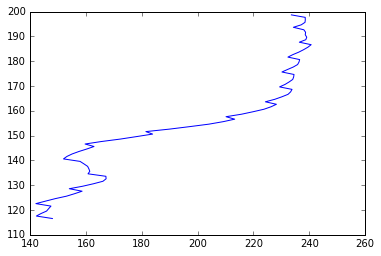

In [20]:
plt.figure()
plt.plot(tdf['temp'],tdf['alt'])
plt.show()

In [7]:
def bin_combined(df,alt_col,temp_col,binby,binmin,binmax,binstep,savefile=False):
    if 'orbit' in df.columns:
        df.drop('orbit', axis=1, inplace=True)
    bins = np.arange(binmin,binmax,binstep) #create bins
    bin_mids = (bins[1:]+bins[:-1])/2. #keep bin midpoints
    cutdf = pd.cut(df[binby],bins) #cut into bins
    Tgrouped = df.groupby(cutdf)#,as_index=False) #don't show categorical bins
    # New column names
    mean_names = {temp_col:'T_mean',alt_col:'alt_mean','BV_freq':'BV_mean'}
    med_names = {temp_col:'T_med',alt_col:'alt_med','BV_freq':'BV_med'}
    std_names = {temp_col:'T_std',alt_col:'alt_std','BV_freq':'BV_std'}
    # Calculate stats in each bin
    meandf = Tgrouped.mean().rename(columns=mean_names)
    meddf = Tgrouped.median().rename(columns=med_names)
    stddf = Tgrouped.std().rename(columns=std_names)
    newdf = pd.concat([meandf,meddf,stddf],axis=1) #combine and create new DF
    # Add a few more columns
    newdf['bin_mid'] = bin_mids
    newdf['count'] = Tgrouped[temp_col].count()
    newdf['frac_unstab'] = (Tgrouped.apply(lambda x: x['BV_freq'][x['BV_freq']<0].count()))/newdf['count']
    newdf = newdf[newdf['count']>0.] #only keep non-null rows
    if savefile:
        newdf.to_csv(savefile,index=False)
    return newdf

In [8]:
#Some constants
g = 3.81 #m/s^2 surface gravity
M_Mars =  0.64171e+24 #kg
R_Mars = 3396.2e+3 #m
Grav = 6.67408e-11 #m^3 kg^-1 s^-2
amu = 1.660539040e-27 #kg
kboltz = 1.38064852e-23 #J/K

def cp(T):
    '''
    Calculate specific heat in Mars' upper atmosphere via
    Magalhaes et al. 1999.
    cp in J/(kg K)
    '''
    return 0.0033 * T**2 -  0.2716 * T + 656.3 #from Magalhaes et al. 1999

def static_stability(alt,temp):
    '''
    Compute (dT/dz + g/cp) from a given temperature profile
    SS in K/m
    '''
    #dz = np.gradient(alt)
    dTdz = np.gradient(temp,alt)
    cpz = cp(temp)

    return dTdz + g/cpz

def wB_freq(alt,temp):
    # N^2
    # K/m * m/(s2 K) = s^-2
    return static_stability(alt,temp)*g/temp

In [243]:
import glob
files = glob.glob('../data/euvm_temperatures_v01r00/temp_[7-8][0-9][0-9]out*')
print len(files)

68


In [244]:
for i,f in enumerate(files[:30]):
    readin = spi.readsav(f)
    print 'Lat:', np.mean(readin['location_info'][0][1]), 'LT:', np.mean(readin['location_info'][0][3])
    tempdf = pd.DataFrame(readin['temp'],columns=['alt','temp'])
    tempdf = tempdf.apply(lambda x: x.values.byteswap().newbyteorder())
    tempdf['BV_freq'] = wB_freq(tempdf['alt']*1000,tempdf['temp'])
    if i == 0:
        tadf = tempdf
    else:
        tadf= pd.concat([tadf,tempdf],ignore_index=True)

Lat: 51.0787452395 LT: 8.18043351211
Lat: 51.0816023108 LT: 8.17689509389
Lat: 50.9415487374 LT: 8.16091624788
Lat: 51.1423854837 LT: 8.17456526618
Lat: 51.02513208 LT: 8.16019758112
Lat: 51.4418610371 LT: 8.08833760754
Lat: 51.3455568485 LT: 8.07102293073
Lat: 51.3167342219 LT: 8.06356947503
Lat: 51.3553271082 LT: 8.05668543802
Lat: 51.3464177002 LT: 8.05095783052
Lat: 51.4832923628 LT: 8.05658813702
Lat: 51.3900438554 LT: 8.04425231428
Lat: 51.5540712112 LT: 8.05236628476
Lat: 51.6691676013 LT: 8.05640116094
Lat: 51.7289206605 LT: 8.05613242984
Lat: 51.431734905 LT: 8.02661827081
Lat: 51.6998923296 LT: 8.04406249164
Lat: 51.6377079043 LT: 8.02720742437
Lat: 51.6353811594 LT: 8.02203902802
Lat: 51.7196361804 LT: 8.02327568395
Lat: 51.5965750861 LT: 8.00802058171
Lat: 51.5958864549 LT: 8.00233471163
Lat: 51.498803477 LT: 7.98969420979
Lat: 51.8000482627 LT: 8.00779762477
Lat: 51.8052312655 LT: 8.00263868633
Lat: 51.5314738488 LT: 7.97540296986
Lat: 51.76263448 LT: 7.99044497953
Lat: 51

In [245]:
binmin = 80
binmax = 300
binstep = 1
binby = 'alt'
#bins = np.arange(binmin,binmax,binstep) #create bins
#bin_mids = (bins[1:]+bins[:-1])/2. #keep bin midpoints
#cutdf = pd.cut(tadf[binby],bins) #cut into bins
#Tgrouped = tadf.groupby(cutdf)#,as_index=False) #don't show categorical bins

In [279]:
tmean = bin_combined(tadf,'alt','temp',binby,binmin,binmax,binstep)
bins = np.arange(115,180,binstep)
print tmean.columns
tmean.head()

Index([u'alt_mean', u'T_mean', u'BV_mean', u'alt_med', u'T_med', u'BV_med',
       u'alt_std', u'T_std', u'BV_std', u'bin_mid', u'count', u'frac_unstab'],
      dtype='object')


,alt_mean,T_mean,BV_mean,alt_med,T_med,BV_med,alt_std,T_std,BV_std,bin_mid,count,frac_unstab
alt,,,,,,,,,,,,
"(108, 109]",108.435596,237.061493,0.000076,108.435596,237.061493,0.000076,NaN,NaN,NaN,108.5,1,0
"(109, 110]",109.621067,167.405071,0.000133,109.621067,167.405071,0.000133,0.282523,68.240795,0.000065,109.5,2,0
"(110, 111]",110.609657,154.843742,0.000147,110.609657,154.843742,0.000147,0.286589,63.900449,0.000071,110.5,2,0
"(111, 112]",111.598257,146.743145,0.000154,111.598257,146.743145,0.000154,0.290645,56.228093,0.000068,111.5,2,0
"(112, 113]",112.586867,138.171047,0.000167,112.586867,138.171047,0.000167,0.294690,55.132280,0.000075,112.5,2,0


In [281]:
tmean = tmean[(tmean['count']>10)&(tmean['bin_mid']<180)]

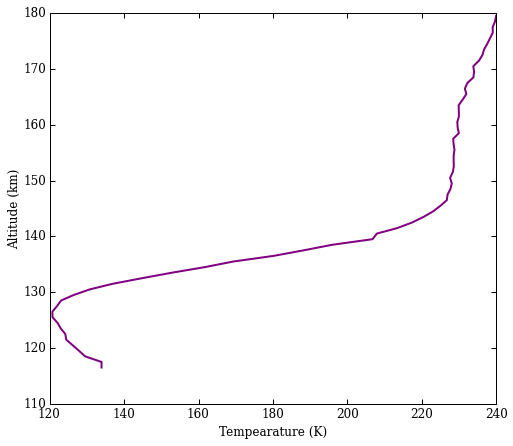

In [302]:
plt.figure(figsize=(8,7))
plt.plot(tmean['T_mean'],tmean['bin_mid'],color='purple',lw=2)
plt.xlabel('Tempearature (K)')
plt.ylabel('Altitude (km)')
plt.savefig('../../MCS/reports/PSG /PSG_201803/EUVM_T.png',dpi=500)
plt.show()

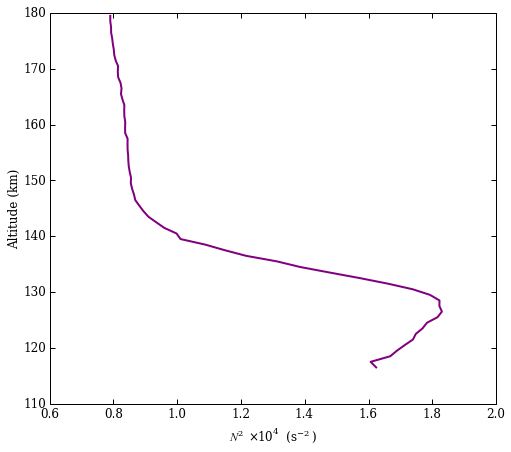

In [303]:
plt.figure(figsize=(8,7))
plt.plot(tmean['BV_mean']*1.e+4,tmean['bin_mid'],color='purple',lw=2)
plt.xlabel(r'$N^2 \times 10^4$ (s$^{-2}$)')
plt.ylabel('Altitude (km)')
plt.savefig('../../MCS/reports/PSG /PSG_201803/EUVM_N.png',dpi=500)
plt.show()

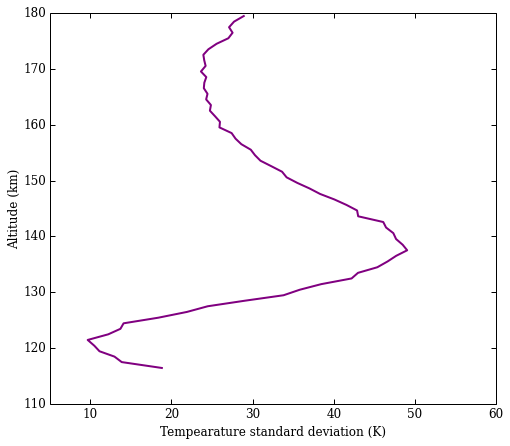

In [304]:
plt.figure(figsize=(8,7))
plt.plot(tmean['T_std'],tmean['alt_mean'],color='purple',lw=2)
plt.xlabel('Tempearature standard deviation (K)')
plt.ylabel('Altitude (km)')
plt.xlim(xmax=60)
plt.savefig('../../MCS/reports/PSG /PSG_201803/EUVM_SD.png',dpi=500)
plt.show()

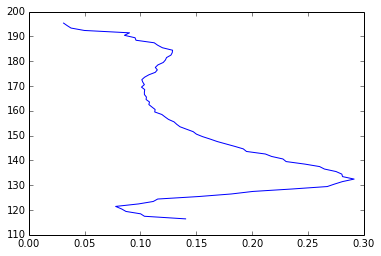

In [251]:
plt.figure()
plt.plot(tmean['T_std']/tmean['T_mean'],tmean['alt_mean'])
plt.show()

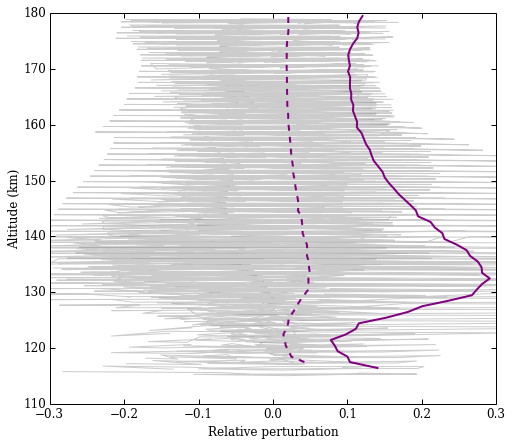

In [301]:
plt.figure(figsize=(8,7))
cutdf = pd.cut(tadf['alt'],bins) #cut into bins
ste = tmean['T_std']/np.sqrt(tadf['temp'].groupby(cutdf).count())
for name, group in tadf.groupby(cutdf):
    Twavg = group['temp'].mean()
    Tpert = (group['temp'] - Twavg)/Twavg
    plt.plot(Tpert, group['alt'],c='gray',ms=0,alpha=0.4)
plt.plot(tmean['T_std']/tmean['T_mean'],tmean['alt_mean'],color='purple',lw=2)
plt.plot(ste.values[:-1]/tmean['T_mean'],tmean['alt_mean'],color='purple',ls='--',lw=2)
plt.ylim(110,180)
plt.xlim(-0.3,0.3)
plt.xlabel('Relative perturbation')
plt.ylabel('Altitude (km)')
plt.savefig('../../MCS/reports/PSG /PSG_201803/EUVM_RP.png',dpi=500)
plt.show()